# The Goal here is to get some doumentaries and comedy routies from scrapes from the loft website and then to use textblob in order to analyze the sentiment -- objectivity and polarity.

In [1]:

import requests ## THIS SENDS OUT REQUESTS TO THE WEBSITES
from bs4 import BeautifulSoup
import pickle
import pandas as pd
import numpy as np
import math
import os
os.getcwd()
from collections import Counter

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Scrapes transcript data 
def url_to_transcript(url):
    '''Returns song data specifically from https://scrapsfromtheloft.com'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")

    text = [p.text for p in soup.find(class_="post-content").find_all('p')]
    print(url)
    return text



# URLs of transcripts
urls = ['https://scrapsfromtheloft.com/2019/06/16/jo-koy-live-from-seattle-transcript/',
'https://scrapsfromtheloft.com/2019/04/30/robin-williams-weapons-of-self-destruction-transcript/',
'https://scrapsfromtheloft.com/2019/04/01/in-conversation-with-jerry-seinfeld/',
'https://scrapsfromtheloft.com/2019/03/18/sicko-2007-transcript/',
'https://scrapsfromtheloft.com/2018/08/17/bill-cosby-fall-of-an-american-icon-bbc-documentary/',
'https://scrapsfromtheloft.com/2017/09/30/living-proof/']

#Speaker names
speakers= ['Jo', 'Robin', 'Jerry', 'Michael', 'Thandie', 'Christopher']

In [2]:
# Actually request transcripts 
# (takes a few minutes to run)
lyrics1 = [url_to_transcript(u) for u in urls]


https://scrapsfromtheloft.com/2019/06/16/jo-koy-live-from-seattle-transcript/
https://scrapsfromtheloft.com/2019/04/30/robin-williams-weapons-of-self-destruction-transcript/
https://scrapsfromtheloft.com/2019/04/01/in-conversation-with-jerry-seinfeld/
https://scrapsfromtheloft.com/2019/03/18/sicko-2007-transcript/
https://scrapsfromtheloft.com/2018/08/17/bill-cosby-fall-of-an-american-icon-bbc-documentary/
https://scrapsfromtheloft.com/2017/09/30/living-proof/


In [3]:
# # Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/2019/06/16/jo-koy-live-from-seattle-transcript/
https://scrapsfromtheloft.com/2019/04/30/robin-williams-weapons-of-self-destruction-transcript/
https://scrapsfromtheloft.com/2019/04/01/in-conversation-with-jerry-seinfeld/
https://scrapsfromtheloft.com/2019/03/18/sicko-2007-transcript/
https://scrapsfromtheloft.com/2018/08/17/bill-cosby-fall-of-an-american-icon-bbc-documentary/
https://scrapsfromtheloft.com/2017/09/30/living-proof/


In [4]:
# # Pickle files for later use

# # Make a new directory to hold the text files
#!mkdir transcripts

for i, c in enumerate(speakers):
    
    with open("transcripts" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)##pickle method can quickly save/load files into memory

In [5]:
# Load pickled files
data = {}
for i, c in enumerate(speakers):
    with open("transcripts" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [6]:
type(dict)

type

In [7]:
# Let's take a look at our data again
next(iter(data.keys()))

'Jo'

In [8]:
# Notice that our dictionary is currently in key: comedian, value: list of text format
next(iter(data.values()))

['Yo\nFinally here\nYou know I’m finally here\nFinally here\nYou know I’m finally here\nI hear these people talking about\nWhere I been I been on tour trying to work it out\nThey talking, like “Man, you finally made it, dawg”\nShit, I’m working on copping\nMy second house I remember back when\nNo one wanted to listen\nKind of funny who done came and gone\nBut I’m still here\nAnd I ain’t going nowhere\nNah, it’s my time, homey\nThis where I belong\nTruth is, I’m a savage…',
 'I’m home, you guys. [chuckling] Look at the diversity in this room. Every color. [cheers and applause] That’s what I love about Seattle. There’s, like, every color just mixed with everybody else. [audience laughing] Good shit. We’ve got Latinos out here. [cheering] Somehow you guys swam up. “Just keep going! I swear to God, mijo. Keep going!”',
 'When I first moved out here… Like, when I was living out here, this is where the Indian casinos started opening. Like Muckleshoot. Remember that? Is that still around? – [

In [9]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [10]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [11]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcripts']
data_df = data_df.sort_index()
data_df

,transcripts
Christopher,"Instead of marveling at the number of books, articles, and documentaries he produced, some of the author’s friends muttered about the quantity of ..."
Jerry,The Empire Interview “I had a good ride with the TV series. I got to enjoy big-time show business. But what I love is just sitting with a notepad....
Jo,Yo\nFinally here\nYou know I’m finally here\nFinally here\nYou know I’m finally here\nI hear these people talking about\nWhere I been I been on to...
Michael,"Sicko is not about the 47 million Americans who don’t have health insurance, it’s about some of the 250 million who have/had health insurance and ..."
Robin,"In this comedy special taped at DAR Constitution Hall, his first solo special on the network in seven years, Williams covers such topics as global..."
Thandie,"[Reporters] Nicole, good evening. The first of four days of pre-trial motion hearings.\nThe prosecution wants to call about a dozen women at trial..."


# Using Regex to clean the data.

In [1]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [13]:

# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcripts.apply(round1))
data_clean

,transcripts
Christopher,instead of marveling at the number of books articles and documentaries he produced some of the author’s friends muttered about the quantity of boo...
Jerry,the empire interview “i had a good ride with the tv series i got to enjoy bigtime show business but what i love is just sitting with a notepad bei...
Jo,yo\nfinally here\nyou know i’m finally here\nfinally here\nyou know i’m finally here\ni hear these people talking about\nwhere i been i been on to...
Michael,sicko is not about the million americans who don’t have health insurance it’s about some of the million who havehad health insurance and in spit...
Robin,in this comedy special taped at dar constitution hall his first solo special on the network in seven years williams covers such topics as global w...
Thandie,nicole good evening the first of four days of pretrial motion hearings\nthe prosecution wants to call about a dozen women at trial\nthey also all...


In [14]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [15]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcripts.apply(round2))
data_clean

,transcripts
Christopher,instead of marveling at the number of books articles and documentaries he produced some of the authors friends muttered about the quantity of booz...
Jerry,the empire interview i had a good ride with the tv series i got to enjoy bigtime show business but what i love is just sitting with a notepad bein...
Jo,yofinally hereyou know im finally herefinally hereyou know im finally herei hear these people talking aboutwhere i been i been on tour trying to w...
Michael,sicko is not about the million americans who dont have health insurance its about some of the million who havehad health insurance and in spite ...
Robin,in this comedy special taped at dar constitution hall his first solo special on the network in seven years williams covers such topics as global w...
Thandie,nicole good evening the first of four days of pretrial motion hearingsthe prosecution wants to call about a dozen women at trialthey also allege ...


In [16]:
# Let's add the comedians' full names as well
full_names = ['Christopher', 'Jerry', 'Jo', 'Michael', 'Robin', 'Thandie']

data_clean['full_name'] = full_names
data_clean

,transcripts,full_name
Christopher,instead of marveling at the number of books articles and documentaries he produced some of the authors friends muttered about the quantity of booz...,Christopher
Jerry,the empire interview i had a good ride with the tv series i got to enjoy bigtime show business but what i love is just sitting with a notepad bein...,Jerry
Jo,yofinally hereyou know im finally herefinally hereyou know im finally herei hear these people talking aboutwhere i been i been on tour trying to w...,Jo
Michael,sicko is not about the million americans who dont have health insurance its about some of the million who havehad health insurance and in spite ...,Michael
Robin,in this comedy special taped at dar constitution hall his first solo special on the network in seven years williams covers such topics as global w...,Robin
Thandie,nicole good evening the first of four days of pretrial motion hearingsthe prosecution wants to call about a dozen women at trialthey also allege ...,Thandie


In [17]:
data=data_clean

In [18]:
data.head()

,transcripts,full_name
Christopher,instead of marveling at the number of books articles and documentaries he produced some of the authors friends muttered about the quantity of booz...,Christopher
Jerry,the empire interview i had a good ride with the tv series i got to enjoy bigtime show business but what i love is just sitting with a notepad bein...,Jerry
Jo,yofinally hereyou know im finally herefinally hereyou know im finally herei hear these people talking aboutwhere i been i been on tour trying to w...,Jo
Michael,sicko is not about the million americans who dont have health insurance its about some of the million who havehad health insurance and in spite ...,Michael
Robin,in this comedy special taped at dar constitution hall his first solo special on the network in seven years williams covers such topics as global w...,Robin


# Importing textblob to analyze sensitivity and subjectivity.

In [19]:
from textblob import TextBlob## Textblob assigns sentiment scores to text.

pol=lambda x: TextBlob(x).sentiment.polarity
sub=lambda x: TextBlob(x).sentiment.subjectivity

data['polarity']=data['transcripts'].apply(pol)
data['subjectivity']=data['transcripts'].apply(sub)

In [20]:
#data=data.reset_index()
#data=data.set_index('level_0')
data.columns

Index(['transcripts', 'full_name', 'polarity', 'subjectivity'], dtype='object')

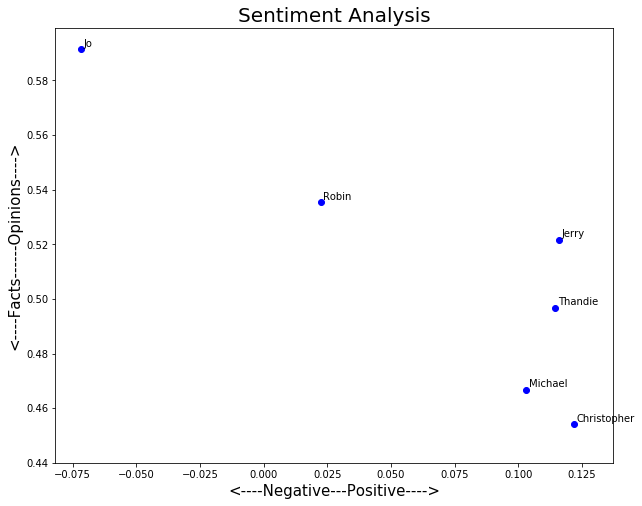

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=[10,8]
for index, comedian in enumerate(data.index):
    x=data.polarity.loc[comedian]
    y=data.subjectivity.loc[comedian]
    plt.scatter(x,y,color='blue')
    plt.text(x+0.001, y+.001, data['full_name'][index],fontsize=10)
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<----Negative---Positive---->',fontsize=15)
plt.ylabel('<----Facts------Opinions---->',fontsize=15)
plt.show()

# Christopher is the most positive in regards to sentiment and also most factual based.
# Jo Koy is the most opinionated and most negative. 

In [22]:
##this is a demo only

n=10
text=data['transcripts'][0]
length=len(text)
size=math.floor(length/n)
start=np.arange(0,length, size)


split_list=[]
for piece in range(n):
    split_list.append(text[start[piece]:start[piece]+size])

In [25]:
import numpy as np
import math

def split_text(text, n=10):
    
    length=len(text)
    size=math.floor(length/n)
    start=np.arange(0,length, size)
    
    split_list=[]
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [26]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcripts:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['instead of marveling at the number of books articles and documentaries he produced some of the authors friends muttered about the quantity of booze he drank now medical science backs his longheld belief that booze is a subtle weapon plus hitchs tips on drinking right by christopher hitchens my heart soared like a hawk when i read the recent study which recommended eating at least a clove of garlic a day appar\xadent\xadly this treatment along with plen\xadty of onions would toughen up my prostate gland i had been vastly encouraged already by the news that tobacco smoking en\xadhanced shortterm memory and helped to ward off the onset of alz\xadheimers disease and then it was good to read that decaffein\xadated coffee beans were actually higher in cholesterol than the real thing but the very best news was saved for januarys edition of the new england journal of medicine from there i learned that in the breezy words of my hometown rag the washington post drinking a glass or two of wine

In [28]:

# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.23214756258234517,
  0.06537153322867609,
  0.0501082251082251,
  0.021368861024033427,
  0.03348484848484847,
  0.2514200831847891,
  0.07884615384615384,
  0.005204216073781293,
  0.25617777777777784,
  0.2605263157894737],
 [0.13521765271765268,
  0.08922101449275363,
  0.13180690017053653,
  0.2117992232353935,
  0.1527805527805528,
  0.03616127583108714,
  0.048990049302549306,
  0.08574357520786094,
  0.19002079619726683,
  0.07950060450060449],
 [0.015563909774436058,
  -0.04728835978835981,
  -0.041782407407407414,
  -0.07639880952380955,
  0.028730367860802634,
  -0.17810489060489063,
  -0.10178409898559154,
  -0.10427881297446515,
  -0.0657010582010582,
  -0.13216122868900643],
 [0.0785842916903523,
  0.07206761492475777,
  0.07804414335664336,
  0.1462913145056002,
  0.12210529329576947,
  0.09049204162840523,
  0.15990975074308406,
  0.09854883731932916,
  0.05726877065586743,
  0.11200253670491768],
 [0.020435266955266918,
  0.0259235209235209,
  0.017277167277167285,


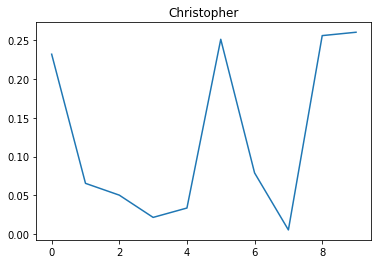

In [29]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()